# Balloon Map Plotter

This simple notebook shows how we can read ballon experiment header data from the HDF5 and make some plots on maps


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import h5py
import antgeom
import scipy
from scipy.spatial.transform import Rotation as R

a=np.array([[1,2,3,4],[5,6,7,8]])
print(a.shape)
np.einsum('ik,ik->i',a,a)
vx=np.arange(18).reshape(2,3,3)

cd=np.einsum('ijl,ilk->ijk',vx,vx)
print("vx",vx)
print("vxdot",np.dot(vx, vx))
print("einsum",cd)
scale=np.array([1,0.5])
print(np.einsum('ijk,i->ijk',cd,scale))
      

(2, 4)
vx [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
vxdot [[[[ 15  18  21]
   [ 42  45  48]]

  [[ 42  54  66]
   [150 162 174]]

  [[ 69  90 111]
   [258 279 300]]]


 [[[ 96 126 156]
   [366 396 426]]

  [[123 162 201]
   [474 513 552]]

  [[150 198 246]
   [582 630 678]]]]
einsum [[[ 15  18  21]
  [ 42  54  66]
  [ 69  90 111]]

 [[366 396 426]
  [474 513 552]
  [582 630 678]]]
[[[ 15.   18.   21. ]
  [ 42.   54.   66. ]
  [ 69.   90.  111. ]]

 [[183.  198.  213. ]
  [237.  256.5 276. ]
  [291.  315.  339. ]]]


In [2]:
run=130
f = h5py.File('flight2016/hdf5/run'+str(run)+'/header'+str(run)+'.hdf5')
rungr=f['run'+str(run)]


In [3]:
print(rungr.keys())

<KeysViewHDF5 ['altitude', 'attFlag', 'brms', 'distToWais', 'eventNumber', 'goodTimeFlag', 'heading', 'isWAIS', 'isWAISH', 'l3TrigPattern', 'l3TrigPatternH', 'latitude', 'longitude', 'mrms', 'phiTrigMask', 'phiTrigMaskH', 'pitch', 'priority', 'roll', 'triggerTime', 'triggerTimeNs']>


Text(0, 0.5, 'Altitude (m)')

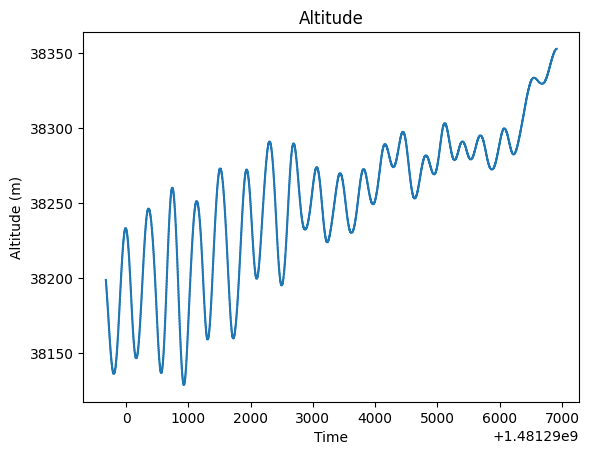

In [4]:
fig,ax = plt.subplots()
ax.set_title("Altitude")
#print(rungr['triggerTime'][:])
ax.plot(rungr['triggerTime'][:],rungr['altitude'][:])
ax.set_xlabel("Time")
ax.set_ylabel("Altitude (m)")

distToWais [212528.87067048 212528.74107927 212528.74107927 ... 123208.50525742
 123208.50525742 123208.36563324]


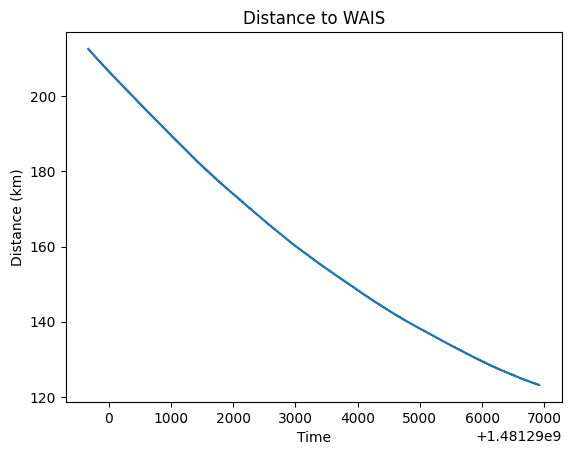

In [5]:
fig,ax = plt.subplots()
ax.set_title("Distance to WAIS")
ax.plot(rungr['triggerTime'][:],rungr['distToWais'][:]/1e3)
ax.set_xlabel("Time")
ax.set_ylabel("Distance (km)")

print('distToWais',rungr['distToWais'][:])

isWAIS=rungr['isWAIS'][:]
l3TrigPattern=np.array(rungr['l3TrigPattern'][:][isWAIS])
l3TrigPatternH=np.array(rungr['l3TrigPatternH'][:][isWAIS])
hitPhiSum=np.zeros(l3TrigPattern.shape)
countPhiSum=np.zeros(l3TrigPattern.shape)
for i in range(16):
    mask=1<<i
    hitPhiSum+=(i+1)*((l3TrigPattern&mask)/mask)
    countPhiSum+=(l3TrigPattern&mask)/mask
    hitPhiSum+=(i+1)*((l3TrigPatternH&mask)/mask)
    countPhiSum+=(l3TrigPatternH&mask)/mask
hitPhiSum/=countPhiSum


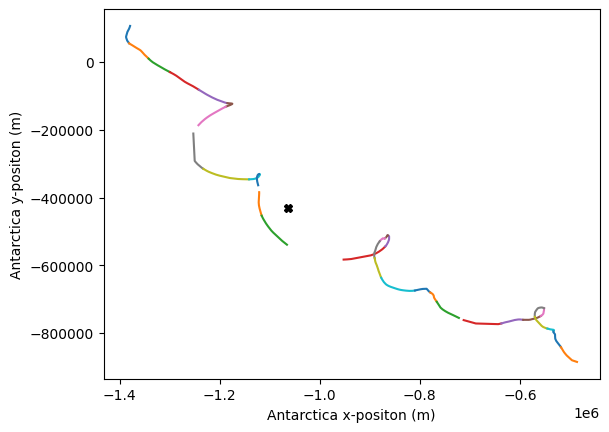

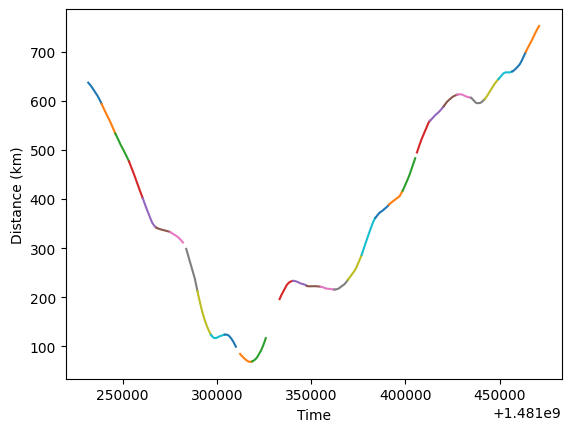

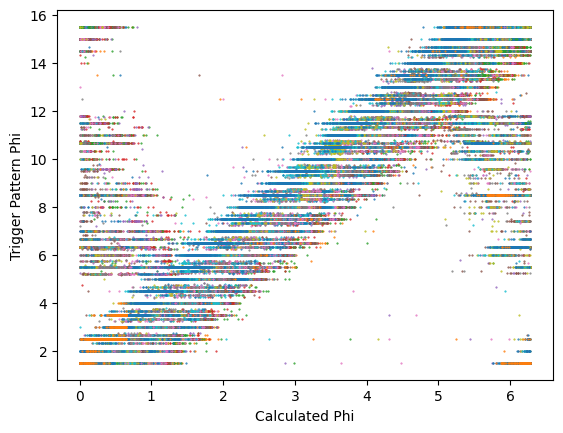

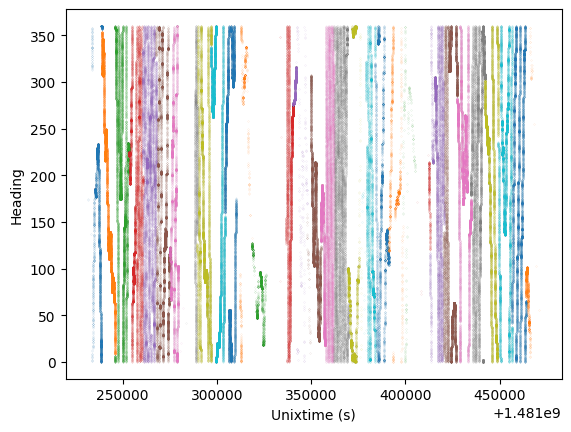

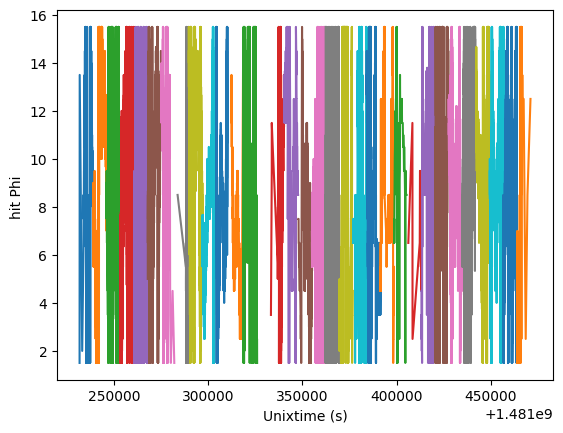

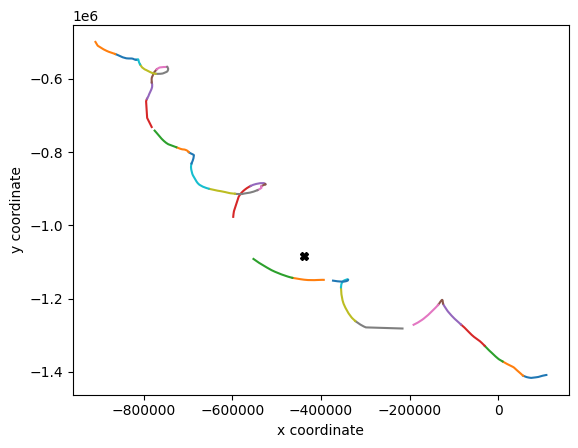

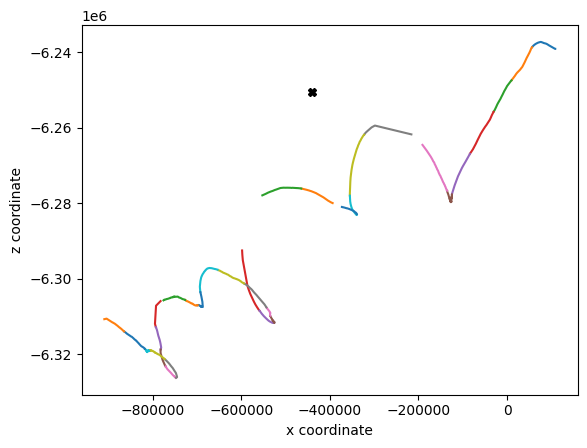

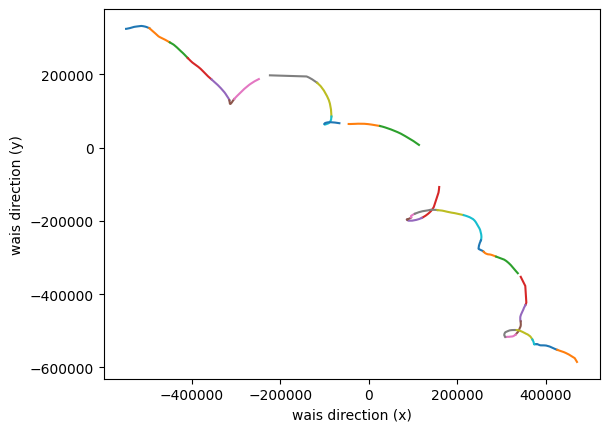

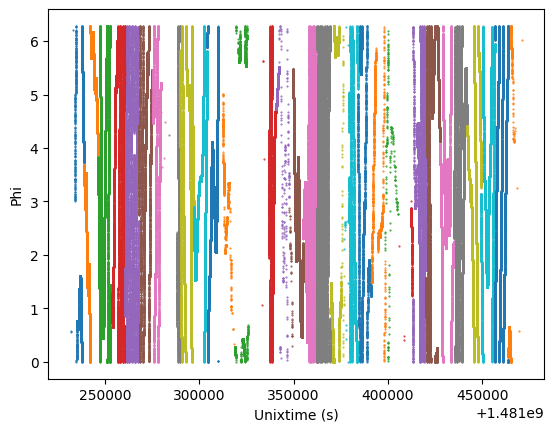

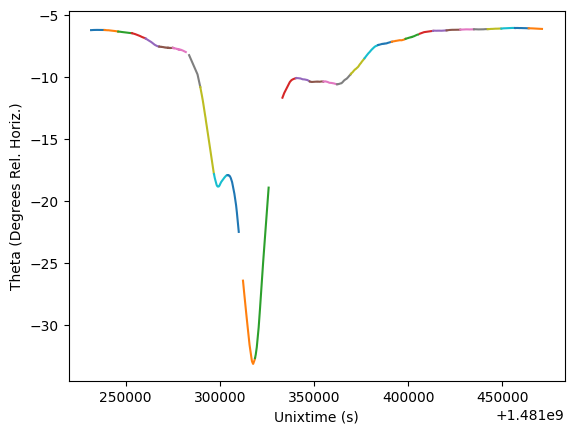

In [6]:

    
myGeom=antgeom.AntGeom()

fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()
fig5,ax5 = plt.subplots()
fig6,ax6 = plt.subplots()
fig7,ax7 = plt.subplots()
fig8,ax8 = plt.subplots()
fig9,ax9 = plt.subplots()
fig10,ax10 = plt.subplots()
                
for run in range(120,155):
    f = h5py.File('flight2016/hdf5/run'+str(run)+'/header'+str(run)+'.hdf5')
    rungr=f['run'+str(run)]
    if 'latitude' in rungr.keys():
        isWAIS=rungr['isWAIS'][:]+rungr['isWAISH'][:]
        if np.sum(isWAIS) < 100: 
            continue
        lat=np.array(rungr['latitude'][:][isWAIS])
        lon=np.array(rungr['longitude'][:][isWAIS])
        alt=np.array(rungr['altitude'][:][isWAIS])
        heading=np.array(rungr['heading'][:][isWAIS])
        triggerTime=np.array(rungr['triggerTime'][:][isWAIS])
        distToWais=np.array(rungr['distToWais'][:][isWAIS])/1e3
        l3TrigPattern=np.array(rungr['l3TrigPattern'][:][isWAIS])
        l3TrigPatternH=np.array(rungr['l3TrigPatternH'][:][isWAIS])
        hitPhiSum=np.zeros(l3TrigPattern.shape)
        countPhiSum=np.zeros(l3TrigPattern.shape)
        for i in range(16):
            mask=1<<i
            hitPhiSum+=(i+1)*((l3TrigPattern&mask)/mask)
            countPhiSum+=(l3TrigPattern&mask)/mask
            hitPhiSum+=(i+1)*((l3TrigPatternH&mask)/mask)
            countPhiSum+=(l3TrigPatternH&mask)/mask
        hitPhiSum/=countPhiSum
      
        ax2.plot(triggerTime,distToWais,label="Run "+str(run))

        
        ax4.plot(triggerTime,heading,'.', markersize=0.1,label="Run "+str(run))
        ax4.set_xlabel("Unixtime (s)")
        ax4.set_ylabel("Heading")

        
        ax5.plot(triggerTime,hitPhiSum,label="Run "+str(run))
        ax5.set_xlabel("Unixtime (s)")
        ax5.set_ylabel("hit Phi ")
        
    
        antX,antY=myGeom.latlonToAntarctica(lat,lon)
        ax.plot(antX,antY,label="Run "+str(run))
        ax.set_xlabel("Antarctica x-positon (m)")   
        ax.set_ylabel("Antarctica y-positon (m)") 

        
        x,y,z=myGeom.latlonaltToXYZ(lat,lon,alt)
        x2,y2,z2=myGeom.latlonaltToXYZ(lat,lon,alt+100)
        ax6.plot(x,y,label="Run "+str(run))
        ax6.set_xlabel("x coordinate")
        ax6.set_ylabel("y coordinate")


        ax7.plot(x,z,label="Run "+str(run))
        ax7.set_xlabel("x coordinate")
        ax7.set_ylabel("z coordinate")



        ax8.plot(myGeom.waisX-x,myGeom.waisY-y,label="Run "+str(run))
        ax8.set_xlabel("wais direction (x)")
        ax8.set_ylabel("wais direction (y)")

        theta,phi=myGeom.getThetaPhiWaveWais(lat,lon,alt,heading)

        
        ax3.plot(phi,hitPhiSum,'.', markersize=1,label="Run "+str(run))
        ax3.set_xlabel("Calculated Phi")
        ax3.set_ylabel("Trigger Pattern Phi")
        
        ax9.plot(triggerTime,phi,'.', markersize=1,label="Run "+str(run))
        ax9.set_xlabel("Unixtime (s)")
        ax9.set_ylabel("Phi")
        
        ax10.plot(triggerTime,np.rad2deg(np.pi/2-theta),label="Run "+str(run))
        ax10.set_xlabel("Unixtime (s)")
        ax10.set_ylabel("Theta (Degrees Rel. Horiz.)")



wX,wY=myGeom.latlonToAntarctica(myGeom.LATITUDE_WAIS_A4,myGeom.LONGITUDE_WAIS_A4)
ax.plot(wX,wY,"X",label="WAIS",color='black')
ax6.plot(myGeom.waisX,myGeom.waisY,"X",label="WAIS",color='black')
ax7.plot(myGeom.waisX,myGeom.waisZ,"X",label="WAIS",color='black')
#ax.legend()    
#ax3.legend()    
##ax2.legend()    
#ax4.legend()
#ax5.legend()
#ax6.legend()
#ax7.legend()
#ax8.legend()
#ax9.legend()
#ax10.legend()
                
            
ax2.set_xlabel("Time")
ax2.set_ylabel("Distance (km)")
fig.savefig('antarcticaY.png')
fig2.savefig("distToWAISvsTime.png")
fig3.savefig("longVsTime.png")
fig4.savefig("headingVsTime.png")
fig5.savefig("latVsTime.png")

Text(0, 0.5, 'Event count')

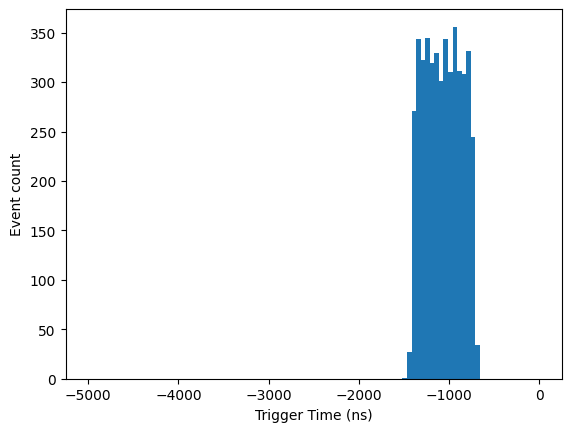

In [7]:
from scipy import constants
run=130
f = h5py.File('flight2016/hdf5/run'+str(run)+'/header'+str(run)+'.hdf5')
rungr=f['run'+str(run)]
fig,ax = plt.subplots()

bins = np.linspace(-5000,0,100)

ax.hist(rungr['triggerTimeNs'][:]-1e9*rungr['distToWais'][:]/constants.c,bins=bins)
ax.set_xlabel("Trigger Time (ns)")
ax.set_ylabel("Event count")


In [8]:
isWAIS=rungr['isWAIS'][:]
print(rungr['eventNumber'][:][isWAIS])

[22896178 22896210 22896229 ... 23161500 23161526 23161628]
